In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('train.xlsx',usecols=['Age','Fare','Survived'])


In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [8]:
X_train

,Age,Fare
30,40.00,27.7208
10,4.00,16.7000
873,47.00,9.0000
182,9.00,31.3875
876,20.00,9.8458
213,30.00,13.0000
157,30.00,8.0500
780,13.00,7.2292
572,36.00,26.3875
77,NaN,8.0500


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 23.  , 34.  , 34.  ,  2.  , 49.  , 18.  , 27.  , 20.  ,
       23.  , 43.  , 35.  ,  3.  ,  0.67, 24.  , 33.  , 31.  , 22.  ,
       28.  , 26.  , 21.  , 29.  , 39.  , 24.  , 47.  , 42.  , 16.  ,
       39.  , 19.  ,  1.  , 48.  , 32.  , 36.  , 23.  , 24.  , 32.  ,
       18.  , 27.  , 24.  , 60.  , 39.  , 16.  ,  8.  , 30.  ,  9.  ,
        9.  , 33.  , 29.  , 40.  ,  3.  , 62.  , 30.  , 17.  , 32.  ,
       47.  , 45.5 , 22.  , 20.  , 30.  , 58.  ,  4.  , 24.  , 16.  ,
       36.  ,  4.  , 22.  , 33.  , 25.  , 21.  , 18.  , 48.  , 14.  ,
       36.  , 21.  , 20.  , 35.  , 29.  , 58.  , 19.  , 36.  , 27.  ,
       24.  , 27.  , 21.  , 22.  , 58.  , 27.  , 71.  , 47.  ,  3.  ,
       40.  , 34.  ,  4.  , 19.  , 30.  , 29.  , 24.  ,  0.75,  2.  ,
       25.  ,  5.  , 21.  , 51.  , 36.  ,  4.  , 31.  , 61.  , 50.  ,
       34.  , 21.  , 28.  ,  9.  , 24.  , 18.  , 24.  , 42.  , 45.  ,
       48.  , 16.  , 39.  , 65.  , 22.  , 21.  , 42.  , 60.  , 61.  ,
       25.  ,  0.83,

In [13]:
X_train['Age'].isnull().sum()

148

In [14]:
X_train


,Age,Fare,Age_imputed
30,40.00,27.7208,40.00
10,4.00,16.7000,4.00
873,47.00,9.0000,47.00
182,9.00,31.3875,9.00
876,20.00,9.8458,20.00
213,30.00,13.0000,30.00
157,30.00,8.0500,30.00
780,13.00,7.2292,13.00
572,36.00,26.3875,36.00
77,NaN,8.0500,35.00


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


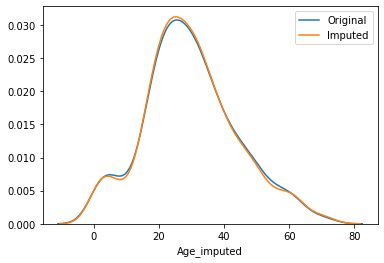

In [15]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [16]:
# variance 

print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  202.95179005910353


In [17]:
# covariance
    
X_train[['Fare', 'Age', 'Age_imputed']].cov() 

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.157125
Age,71.512440,204.349513,204.349513
Age_imputed,57.157125,204.349513,202.951790


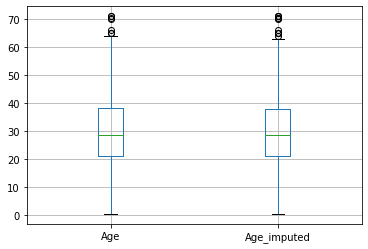

In [18]:
X_train[['Age', 'Age_imputed']].boxplot()


In [23]:
# note-same given input ke liye same random no harbar ganrate karna chahiye age ka value 50 he to fair ka value bhi 50 hona chahiye othewise model proble karega
# 2 user ko different output dikha raha he ye achi bat ni he
# given input ke basis random no generate karega while making production basis product
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


NameError: name 'observations' is not defined

In [24]:
#now for  categorical data

data = pd.read_excel('house-train.xlsx',usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [25]:
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
X = data
y = data['SalePrice']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [33]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [30]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
718,TA,TA,341000,TA,TA
40,TA,TA,160000,TA,TA
300,Gd,TA,157000,TA,Gd
1279,NaN,TA,68400,TA,NaN
1217,NaN,TA,229456,TA,NaN


In [34]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:

In [35]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [36]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.039384
Gd,0.009973,0.010274
Ex,0.000907,0.000856
Po,0.000907,0.000856


In [37]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.652076
TA,0.412439,0.533109
Fa,0.040917,0.054994
Po,0.027823,0.037037
Ex,0.024550,0.033670


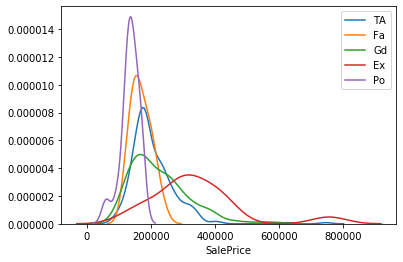

In [38]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

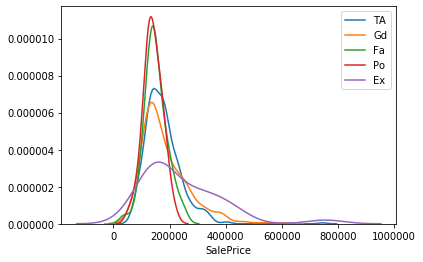

In [39]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()